<a href="https://colab.research.google.com/github/prikmm/MLprojects/blob/main/notebooks/Optimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

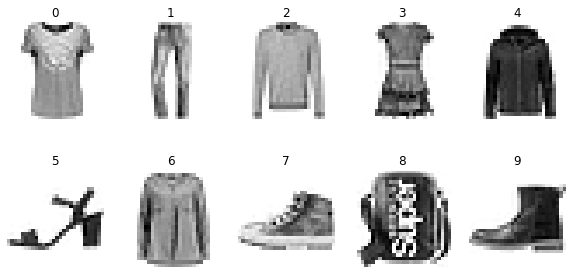

In [23]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

y_uni = np.unique(y_train)
row_num = 2
col_num = 5
fig, axs = plt.subplots(figsize=(10, 5), nrows=row_num, ncols=col_num)
fig.set_facecolor("white")
for i in y_uni:
    images_index = np.where(y_train == i)
    image = X_train[images_index[0][0]]
    col = i % 5
    row = i // 5
    axs[row, col].imshow(image, cmap="binary")
    axs[row, col].set_title(i)
    axs[row, col].axis('off')

In [24]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
              "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [25]:
X_train = X_train/255.0
X_valid = X_valid/255.0
X_test = X_test/255.0

## Batch Normalization:

In [29]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax"),
])

model.compile(loss="sparse_categorical_crossentropy",
               optimizer="sgd",
               metrics=["accuracy"]) 

In [30]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 784)               3136      
_________________________________________________________________
dense_18 (Dense)             (None, 300)               235500    
_________________________________________________________________
batch_normalization_19 (Batc (None, 300)               1200      
_________________________________________________________________
dense_19 (Dense)             (None, 100)               30100     
_________________________________________________________________
batch_normalization_20 (Batc (None, 100)               400       
_________________________________________________________________
dense_20 (Dense)             (None, 10)               

In [34]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization_18/gamma:0', True),
 ('batch_normalization_18/beta:0', True),
 ('batch_normalization_18/moving_mean:0', False),
 ('batch_normalization_18/moving_variance:0', False)]

In [33]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=keras.callbacks.EarlyStopping(patience=10))

Epoch 1/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3016 - accuracy: 0.8927 - val_loss: 0.3310 - val_accuracy: 0.8838
Epoch 2/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2972 - accuracy: 0.8936 - val_loss: 0.3182 - val_accuracy: 0.8876
Epoch 3/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2879 - accuracy: 0.8970 - val_loss: 0.3205 - val_accuracy: 0.8876
Epoch 4/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2828 - accuracy: 0.8997 - val_loss: 0.3150 - val_accuracy: 0.8878
Epoch 5/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2796 - accuracy: 0.9006 - val_loss: 0.3190 - val_accuracy: 0.8886
Epoch 6/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2725 - accuracy: 0.9021 - val_loss: 0.3151 - val_accuracy: 0.8868
Epoch 7/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2684 - accuracy: 0.9037 - val_loss: 0.3138 - val_ac

#### BatchNormalization before implementing activation function:

In [35]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(10, activation="softmax"),
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [37]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=keras.callbacks.EarlyStopping(patience=10))

Epoch 1/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7267 - accuracy: 0.7512 - val_loss: 0.4205 - val_accuracy: 0.8578
Epoch 2/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4541 - accuracy: 0.8421 - val_loss: 0.3871 - val_accuracy: 0.8632
Epoch 3/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4019 - accuracy: 0.8574 - val_loss: 0.3697 - val_accuracy: 0.8694
Epoch 4/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3804 - accuracy: 0.8668 - val_loss: 0.3607 - val_accuracy: 0.8706
Epoch 5/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3643 - accuracy: 0.8714 - val_loss: 0.3460 - val_accuracy: 0.8754
Epoch 6/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3455 - accuracy: 0.8771 - val_loss: 0.3451 - val_accuracy: 0.8754
Epoch 7/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3322 - accuracy: 0.8822 - val_loss: 0.3362 - val_ac

## Transfer Learning:

In [38]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [44]:
X_train_A.shape, X_train_B.shape

((43986, 28, 28), (200, 28, 28))

In [43]:
np.unique(y_train_A), np.unique(y_train_B) 

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=uint8), array([0., 1.], dtype=float32))

In [70]:
tf.random.set_seed(35)
np.random.seed(35)

In [73]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in [300, 100, 50, 50, 50]:
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

model_A.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [74]:
history = model_A.fit(X_train_A, y_train_A, epochs=100,
                    validation_data=(X_valid_A, y_valid_A),
                    callbacks=keras.callbacks.EarlyStopping(patience=10))

Epoch 1/100
1375/1375 [==============================] - 4s 3ms/step - loss: 2.0584 - accuracy: 0.2072 - val_loss: 2.0285 - val_accuracy: 0.3774
Epoch 2/100
1375/1375 [==============================] - 3s 2ms/step - loss: 2.0202 - accuracy: 0.3392 - val_loss: 1.9792 - val_accuracy: 0.4651
Epoch 3/100
1375/1375 [==============================] - 3s 2ms/step - loss: 1.9648 - accuracy: 0.4170 - val_loss: 1.8939 - val_accuracy: 0.4539
Epoch 4/100
1375/1375 [==============================] - 3s 2ms/step - loss: 1.8741 - accuracy: 0.4638 - val_loss: 1.7642 - val_accuracy: 0.4669
Epoch 5/100
1375/1375 [==============================] - 3s 2ms/step - loss: 1.7265 - accuracy: 0.4845 - val_loss: 1.5853 - val_accuracy: 0.5132
Epoch 6/100
1375/1375 [==============================] - 3s 3ms/step - loss: 1.5446 - accuracy: 0.5273 - val_loss: 1.3827 - val_accuracy: 0.5478
Epoch 7/100
1375/1375 [==============================] - 3s 2ms/step - loss: 1.3617 - accuracy: 0.5761 - val_loss: 1.2453 - val_ac

In [75]:
model_A.save("my_model_A.h5")

In [76]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in [300, 100, 50, 50, 50]:
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [77]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B),
                      callbacks=keras.callbacks.EarlyStopping(patience=10))

Epoch 1/20
7/7 [==============================] - 1s 38ms/step - loss: 0.6871 - accuracy: 0.7067 - val_loss: 0.6840 - val_accuracy: 0.5020
Epoch 2/20
7/7 [==============================] - 0s 14ms/step - loss: 0.6830 - accuracy: 0.6285 - val_loss: 0.6799 - val_accuracy: 0.9280
Epoch 3/20
7/7 [==============================] - 0s 15ms/step - loss: 0.6800 - accuracy: 0.8643 - val_loss: 0.6771 - val_accuracy: 0.9229
Epoch 4/20
7/7 [==============================] - 0s 14ms/step - loss: 0.6768 - accuracy: 0.8759 - val_loss: 0.6749 - val_accuracy: 0.9290
Epoch 5/20
7/7 [==============================] - 0s 14ms/step - loss: 0.6742 - accuracy: 0.8753 - val_loss: 0.6723 - val_accuracy: 0.9168
Epoch 6/20
7/7 [==============================] - 0s 14ms/step - loss: 0.6736 - accuracy: 0.8302 - val_loss: 0.6694 - val_accuracy: 0.9249
Epoch 7/20
7/7 [==============================] - 0s 15ms/step - loss: 0.6690 - accuracy: 0.8657 - val_loss: 0.6677 - val_accuracy: 0.8174
Epoch 8/20
7/7 [===========

In [78]:
model_B.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_85 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_86 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_87 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_88 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_89 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_90 (Dense)             (None, 1)               

In [79]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [80]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [81]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

In [82]:
model_B_on_A.compile(loss="binary_crossentropy", 
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=100,
                           validation_data=(X_valid_B, y_valid_B),
                           callbacks=keras.callbacks.EarlyStopping(patience=10))

Epoch 1/100
7/7 [==============================] - 1s 36ms/step - loss: 0.7955 - accuracy: 0.2286 - val_loss: 0.7469 - val_accuracy: 0.3022
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 0.7562 - accuracy: 0.2944 - val_loss: 0.7166 - val_accuracy: 0.3560
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 0.7087 - accuracy: 0.3960 - val_loss: 0.6880 - val_accuracy: 0.4351
Epoch 4/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6837 - accuracy: 0.4510 - val_loss: 0.6611 - val_accuracy: 0.5162
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6642 - accuracy: 0.4992 - val_loss: 0.6361 - val_accuracy: 0.6034
Epoch 6/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6275 - accuracy: 0.6171 - val_loss: 0.6120 - val_accuracy: 0.6755
Epoch 7/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6137 - accuracy: 0.6805 - val_loss: 0.5896 - val_accuracy: 0.7424
Epoch 8/100
7/7 [===

In [85]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/16
7/7 [==============================] - 1s 41ms/step - loss: 0.1186 - accuracy: 0.9973 - val_loss: 0.1275 - val_accuracy: 0.9888
Epoch 2/16
7/7 [==============================] - 0s 15ms/step - loss: 0.1109 - accuracy: 0.9973 - val_loss: 0.1252 - val_accuracy: 0.9899
Epoch 3/16
7/7 [==============================] - 0s 15ms/step - loss: 0.1123 - accuracy: 0.9988 - val_loss: 0.1427 - val_accuracy: 0.9807
Epoch 4/16
7/7 [==============================] - 0s 14ms/step - loss: 0.1105 - accuracy: 0.9931 - val_loss: 0.1246 - val_accuracy: 0.9888
Epoch 5/16
7/7 [==============================] - 0s 14ms/step - loss: 0.1056 - accuracy: 0.9924 - val_loss: 0.1158 - val_accuracy: 0.9929
Epoch 6/16
7/7 [==============================] - 0s 16ms/step - loss: 0.0985 - accuracy: 0.9963 - val_loss: 0.1126 - val_accuracy: 0.9909
Epoch 7/16
7/7 [==============================] - 0s 15ms/step - loss: 0.0978 - accuracy: 0.9963 - val_loss: 0.1145 - val_accuracy: 0.9899
Epoch 8/16
7/7 [===========

In [86]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 1ms/step - loss: 0.5188 - accuracy: 0.7145


[0.5187500715255737, 0.7145000100135803]

In [87]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9905


[0.04031749069690704, 0.9904999732971191]